## Ejercicio 6

**Para la imagen wheat.png, hacer lo siguiente:** 
- Segmentar la imagen de forma que se identifique de forma separada cada grano de trigo mediante el método de Watershed.
- Construir el mapa de clases, pintando de color negro el fondo, y cada grano con un color distinto.
- Combinar la imagen original con una versión pálida del mapa de colores (modifique el canal α del mapa de clases y súmelo con la imagen original), para mostrar los colores obtenidos en el mapa de clases sobre cada grano, como se ilustra en la siguiente figura.

### Librerias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Escala de Grises

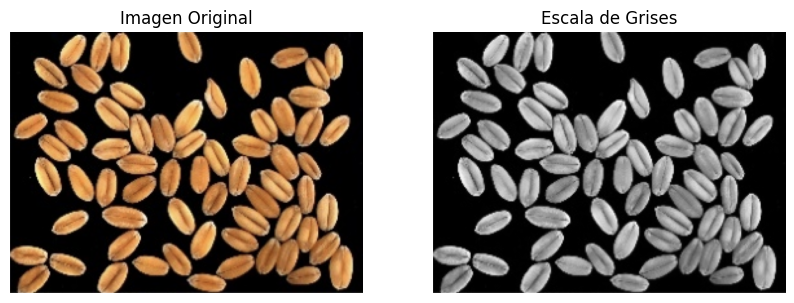

In [2]:
# Cargar la imagen
wheat = cv2.imread("Images/wheat.png")  # Reemplaza con la ruta correcta de tu imagen

# Convertir a escala de grises
wheat_gray = cv2.cvtColor(wheat, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen original y la imagen en escala de grises en subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(wheat, cv2.COLOR_BGR2RGB))
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(wheat_gray, cmap="gray")
ax[1].set_title("Escala de Grises")
ax[1].axis("off")

plt.show()

### Binarizacion y Morfología

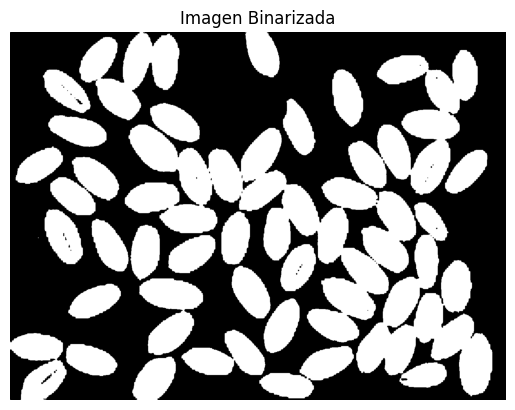

In [3]:
# Aplicar umbralización para binarizar la imagen (manteniendo fondo negro)
_, binary_wheat = cv2.threshold(wheat_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Operaciones morfológicas para mejorar la segmentación
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_wheat, cv2.MORPH_OPEN, kernel, iterations=2)

# Determinar el fondo y primer plano seguros
confirmed_background = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, segmented_foreground = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

# Mostrar la imagen binarizada
plt.imshow(binary_wheat, cmap="gray")
plt.title("Imagen Binarizada")
plt.axis("off")
plt.show()

### Watershed para segmentación

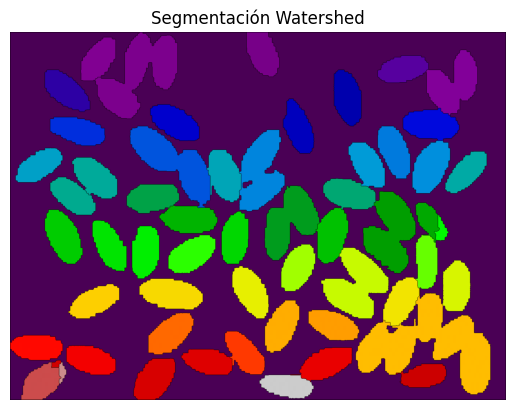

In [4]:
# Convertir a entero sin signo
segmented_foreground = np.uint8(segmented_foreground)
unknown_components = cv2.subtract(confirmed_background, segmented_foreground)

# Etiquetado de componentes conectados
num_labels, markers = cv2.connectedComponents(segmented_foreground)

# Ajustar las etiquetas para que el fondo negro sea 0 y los granos tengan números positivos
markers += 1
markers[unknown_components == 255] = 0

# Aplicar Watershed
watershed_segmentation = wheat.copy()
cv2.watershed(watershed_segmentation, markers)

# Mostrar la segmentación en blanco y negro
plt.imshow(markers, cmap="nipy_spectral")
plt.title("Segmentación Watershed")
plt.axis("off")
plt.show()